In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb


In [2]:
%run code/plotting.py

In [3]:
moon_polar_radius = 1736  # km

In [4]:
def generate_panels_wetterer(N):
    # N must be even, otherwise division by zero may occur in polar angle calculation (z=0)
    
    polars = []
    azimuths = []
    
    z = 1 - 1/N  # from 1 to -1
    for j in range(1, N+1):
        polars.append(np.pi/2 - np.arctan(np.sqrt(1-z**2)/z))
        if j == 1:
            azimuths.append(0.)
        else:
            azimuths.append(np.mod(azimuths[-1] + np.pi * (3-np.sqrt(5)), 2*np.pi))
        
        z -= 2/N
    
    return azimuths, polars

generate_panels_wetterer(4)

([0.0, 2.399963229728653, 4.799926459457306, 0.9167043820063725],
 [0.8480620789814809,
  0.2526802551420786,
  2.8889123984477143,
  2.293530574608312])

In [5]:
def generate_panels_saff(N):
    polars = []
    azimuths = []
    
    for k in range(1, N+1):
        h = -1 + 2 * (k-1) / (N-1)  # from 1 to -1
        polars.append(np.arccos(h))
        if k == 1 or k == N:
            azimuths.append(0.)
        else:
            azimuths.append(np.mod(azimuths[-1] + 3.6 / np.sqrt(N * (1-h**2)), 2*np.pi))
        
    return azimuths, polars

generate_panels_saff(4)

([0.0, 1.9091883092036783, 3.8183766184073566, 0.0],
 [3.141592653589793, 1.9106332362490186, 1.2309594173407747, 0.0])

In [6]:
def calculate_cap_polar_angle(h):
    return np.arccos(moon_polar_radius / (h + moon_polar_radius))

np.degrees(calculate_cap_polar_angle(50))

13.589401732489542

In [7]:
def calculate_required_N(n, cap_polar_angle):
    cap_area = 2 * np.pi * moon_polar_radius**2 * (1 - np.cos(cap_polar_angle))
    sphere_area = 4 * np.pi * moon_polar_radius**2
    N = n / cap_area * sphere_area
    return np.ceil(N)

calculate_required_N(40, calculate_cap_polar_angle(50))

2858.0

In LRO's orbit, ~2858 panels would be necessary that at least 40 panels are visible at all times, as recommended by Wetterer 2014.

13.589401732489542 1429.0


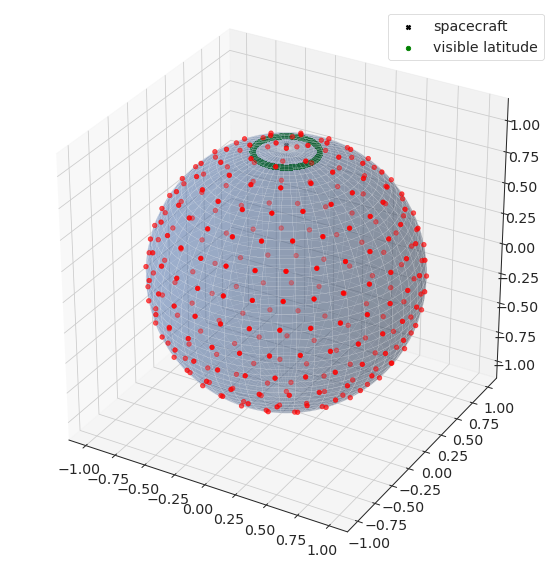

In [10]:
def plot_sphere():
    def polar2cart(u, v):
        # u=azimuth, v=polar
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        return x, y, z
    
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(projection='3d')

    u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]

    ax.plot_surface(*polar2cart(u, v), alpha=0.3, linewidth=0.1)
    
    panels = generate_panels_saff(290)
    # panels = generate_panels_wetterer(290)
    ax.scatter(*polar2cart(*panels), c="red")
    
    h = 50
    cap_polar = calculate_cap_polar_angle(h)
    print(np.degrees(cap_polar), calculate_required_N(20, cap_polar))
    ax.scatter(0, 0, (h + moon_polar_radius) / moon_polar_radius, marker="X", c="black", label="spacecraft")
    ax.scatter(*polar2cart(u, cap_polar), c="green", label="visible latitude")
    
    limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
    ax.set_box_aspect(np.ptp(limits, axis=1))
    
    plt.legend()
    
plot_sphere()

## Unit test data

In [9]:
def generate_unit_test_data():
    azimuths, polars = generate_panels_saff(10)
    print(",\n".join(map(str, polars)))
    print()
    print(",\n".join(map(str, azimuths)))
    
generate_unit_test_data()

3.141592653589793,
2.4619188346815495,
2.1598272970111707,
1.9106332362490186,
1.6821373411358607,
1.4594553124539327,
1.2309594173407747,
0.9817653565786227,
0.6796738189082441,
0.0

0.0,
1.8112150617748297,
3.180364954435027,
4.387841662284913,
5.53335464780712,
0.39568232614974086,
1.6031590339996273,
2.9723089266598244,
4.783523988434654,
0.0
